In [ ]:
#import required modules
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
# import warnings

# warnings.filterwarnings("ignore")

In [ ]:
# define working directory
wd = r"C:\Users\sanne\integrated-modelling-in-hydrology\1_stream\data\cru_ts4.09.1901.2024.pre.dat.nc"

input_folder = os.path.join(wd, "Input")
output_folder = os.path.join(wd, "Output")

In [ ]:
# Open the netCDF file
temp_data = xr.open_dataset(os.path.join(input_folder, "cru_ts4.09.1901.2024.pre.dat.nc" ))

In [7]:
# Check the metadata
print("-------Attributions:-------")
print(temp_data.attrs)
print("-------Dimensions:-------")
print(temp_data.dims)
print("-------Values:-------")
print(temp_data.values)

-------Attributions:-------
{'Conventions': 'CF-1.4', 'title': 'CRU TS4.09 Mean Temperature', 'institution': 'Data held at British Atmospheric Data Centre, RAL, UK.', 'source': 'Run ID = 2503051245. Data generated from:tmp.2503051121.dtb', 'history': 'Wed  5 Mar 13:28:04 GMT 2025 : User f098 : Program makegridsauto.for called by update.for', 'references': 'Information on the data is available at http://badc.nerc.ac.uk/data/cru/', 'comment': 'Access to these data is available to any registered CEDA user.', 'contact': 'support@ceda.ac.uk'}
-------Dimensions:-------
FrozenMappingWarningOnValuesAccess({'time': 1488, 'lat': 360, 'lon': 720})
-------Values:-------
<bound method Mapping.values of <xarray.Dataset> Size: 8GB
Dimensions:  (time: 1488, lat: 360, lon: 720)
Coordinates:
  * time     (time) datetime64[ns] 12kB 1901-01-16 1901-02-15 ... 2024-12-16
  * lat      (lat) float32 1kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon      (lon) float32 3kB -179.8 -179.2 -178.8 -178.

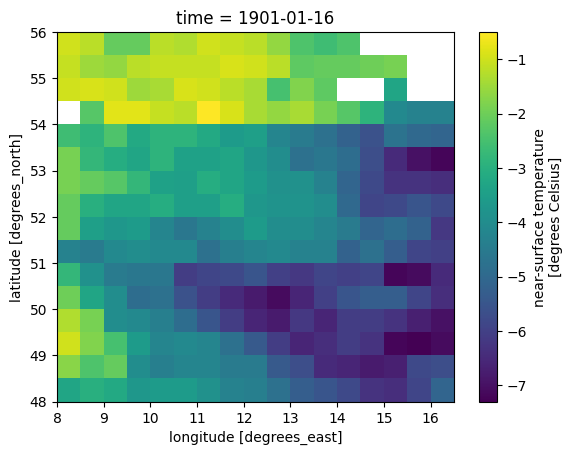

In [ ]:
# Access the temperature data
#import required modules
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# define working directory
wd = r"C:\Users\sanne\integrated-modelling-in-hydrology\1_stream\data\cru_ts4.09.1901.2024.pre.dat.nc"

input_folder = os.path.join(wd, "Input")
output_folder = os.path.join(wd, "Output")

# Open the netCDF file
pre_data = xr.open_dataset(os.path.join(input_folder, "cru_ts4.09.1901.2024.pre.dat.nc" ))

prec = pre_data.pre # Extract temperature data
prec_catchment = pre_data.pre.sel(lon=slice(8.0,16.5), lat=slice(48.0,56.0)) # Select catchment area
prec_catchment[0].plot()

prec = prec.values # Convert to numpy array

import geopandas as gpd

catchment = gpd.read_file("C:\Users\sanne\integrated-modelling-in-hydrology\1_stream\data\Elbe_catchment.gpkg")

In [24]:
# Define catchment boundaries
lon_min, lon_max = 8.0, 16.5
lat_min, lat_max = 48.0, 56.0

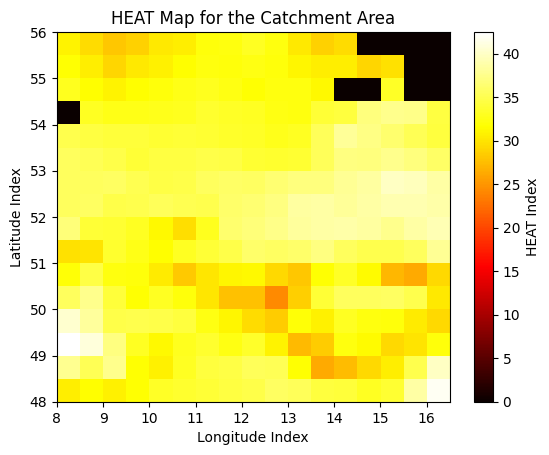

In [25]:
# HEAT maps
temp_avg_list = [] # Create an empty list to store average temperatures

# For each calendar month, calculate the mean temperature, and add it to the list
for i in range (12):
    temp_month = temp_catchment[i::12]
    temp_avg = np.nanmean(temp_month, axis = 0)
    temp_avg_list.append(temp_avg)

list_heat = [] # Create an empty list to store HEAT maps
for i in temp_avg_list:
    y = (i/5)**1.514
    list_heat.append(y)
H = np.nansum(list_heat, axis=0) # Sum HEAT maps to get final HEAT map
HEAT = np.flipud(H) # Flip upside down for correct orientation

plt.imshow(HEAT, cmap='hot', extent=[lon_min, lon_max, lat_min, lat_max])
plt.colorbar(label='HEAT Index')
plt.title('HEAT Map for the Catchment Area')
plt.xlabel('Longitude Index')
plt.ylabel('Latitude Index')
plt.show()


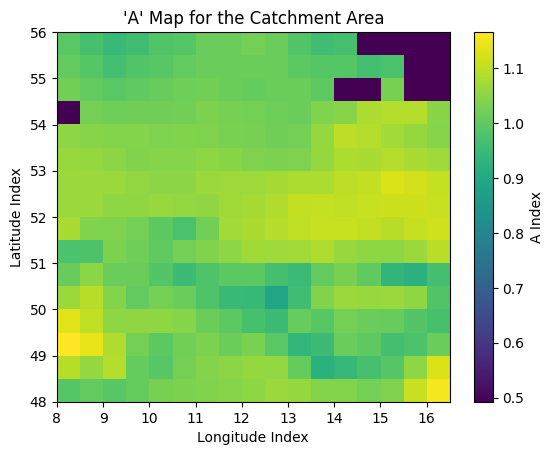

In [27]:
# A map 
A = (0.49239 + 0.01792*HEAT - 0.0000771771*(HEAT**2) + 0.000000675*(HEAT**3)) # Calculate A map using HEAT values
plt.imshow(A, cmap='viridis', extent=[lon_min, lon_max, lat_min, lat_max])
plt.colorbar(label='A Index')
plt.title("'A' Map for the Catchment Area")
plt.xlabel('Longitude Index')
plt.ylabel('Latitude Index')
plt.show()